# Ciencia de Datos en Python

## Proyecto Final

#### Hugo Brian Bay Carnet 20002544
#### Julio Cesar Rodas Carnet 15002024

### Paquetes utilizados

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

### DataSet a utilizar.

In [4]:
data = np.load ('proyecto_training_data.npy')
print(data)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


### Se convierte a un DataFrame para mejor manejo

In [7]:
dataset = pd.DataFrame(data, columns = ['SalesPrice','OverallQual','lstFirSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
dataset

,SalesPrice,OverallQual,lstFirSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### Se separa en un 80% de entranamiento y un 20% prueba

In [9]:
split = 0.8
n = len(dataset['SalesPrice'])
nTrain = int(n*split)
Indices = list(range(0, n))
random.seed(123)
random.shuffle(Indices)

In [12]:
TrainSet = dataset.iloc[Indices[0 : nTrain], :]
TestSet = dataset.iloc[Indices[nTrain : len(Indices)], :]

In [6]:
porc1 = slice(0,1168,1)
porc2 = slice(1168,1460,1) 
Entrena = dataset[porc1] 
Prueba = dataset[porc2]

### Analisis Exploratorio

#### Media por cada variable

In [14]:
media = np.mean(TrainSet, 0)
media

SalesPrice      181308.982021
OverallQual          6.122432
lstFirSF          1157.012842
TotRmsAbvGrd         6.541952
YearBuilt         1971.638699
LotFrontage         69.626556
dtype: float64

#### Valor Maximo

In [15]:
np.amax(TrainSet, 0)

SalesPrice      745000.0
OverallQual         10.0
lstFirSF          3138.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        182.0
dtype: float64

#### Valor Minimo

In [16]:
np.amin(TrainSet, 0)

SalesPrice      34900.0
OverallQual         1.0
lstFirSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1872.0
LotFrontage        21.0
dtype: float64

#### Rango peak to peak

In [17]:
(np.amax(TrainSet, 0)) - (np.amin(TrainSet, 0))

SalesPrice      710100.0
OverallQual          9.0
lstFirSF          2804.0
TotRmsAbvGrd        12.0
YearBuilt          138.0
LotFrontage        161.0
dtype: float64

#### Desviación estándar

In [18]:
np.std(TrainSet, 0)

SalesPrice      79343.589129
OverallQual         1.382836
lstFirSF          371.898384
TotRmsAbvGrd        1.615937
YearBuilt          30.324607
LotFrontage        22.138276
dtype: float64

### Histograma por Variable 

#### SalesPrice

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


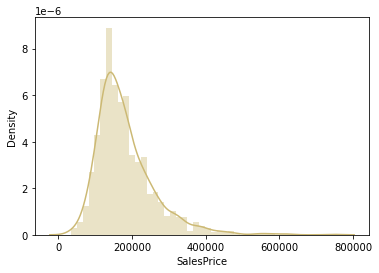

In [21]:
Sal = TrainSet.iloc[:, 0]
sns.set_color_codes()
ax = sns.distplot(Sal, color="y")

#### OverallQual

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


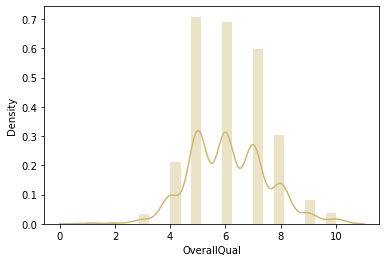

In [22]:
Ove = TrainSet.iloc[:, 1]
sns.set_color_codes()
ax = sns.distplot(Ove, color="y")

#### lstFirSF

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


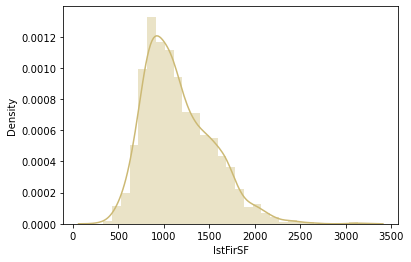

In [23]:
Ist = TrainSet.iloc[:, 2]
sns.set_color_codes()
ax = sns.distplot(Ist, color="y")

#### TotRmsAbvGrd

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


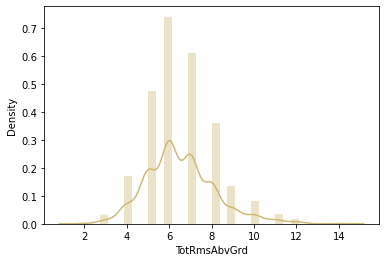

In [24]:
Tot = TrainSet.iloc[:, 3]
sns.set_color_codes()
ax = sns.distplot(Tot, color="y")

#### YearBuilt

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


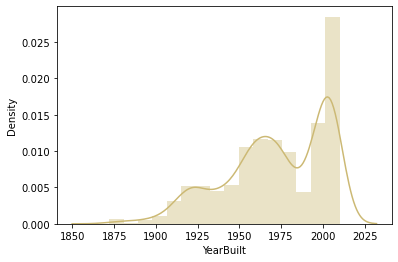

In [25]:
Year = TrainSet.iloc[:, 4]
sns.set_color_codes()
ax = sns.distplot(Year, color="y")

#### LotFrontage

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


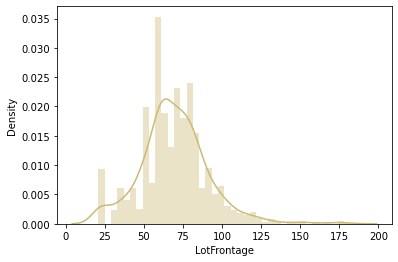

In [26]:
Lot = TrainSet.iloc[:, 5]
sns.set_color_codes()
ax = sns.distplot(Lot, color="y")

### Calculos por cada una de las variables independientes.

#### Coeficiente de correlación

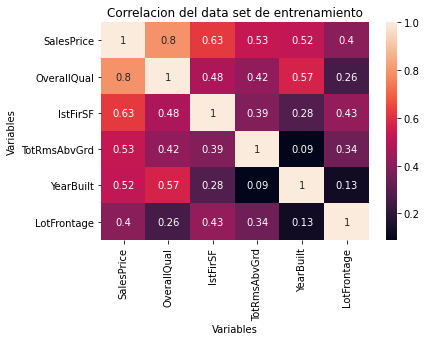

In [27]:
Entrena_small = TrainSet.iloc[:,:6]
correlacion_mat = Entrena_small.corr()
sns.heatmap(correlacion_mat, annot = True)
plt.title("Correlacion del data set de entrenamiento")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

#### Grafica de puntos por x, y

##### OverallQual-SalesPrice

Text(0.5, 1.0, 'LotFrontage-SalesPrice, COEF 0.36')

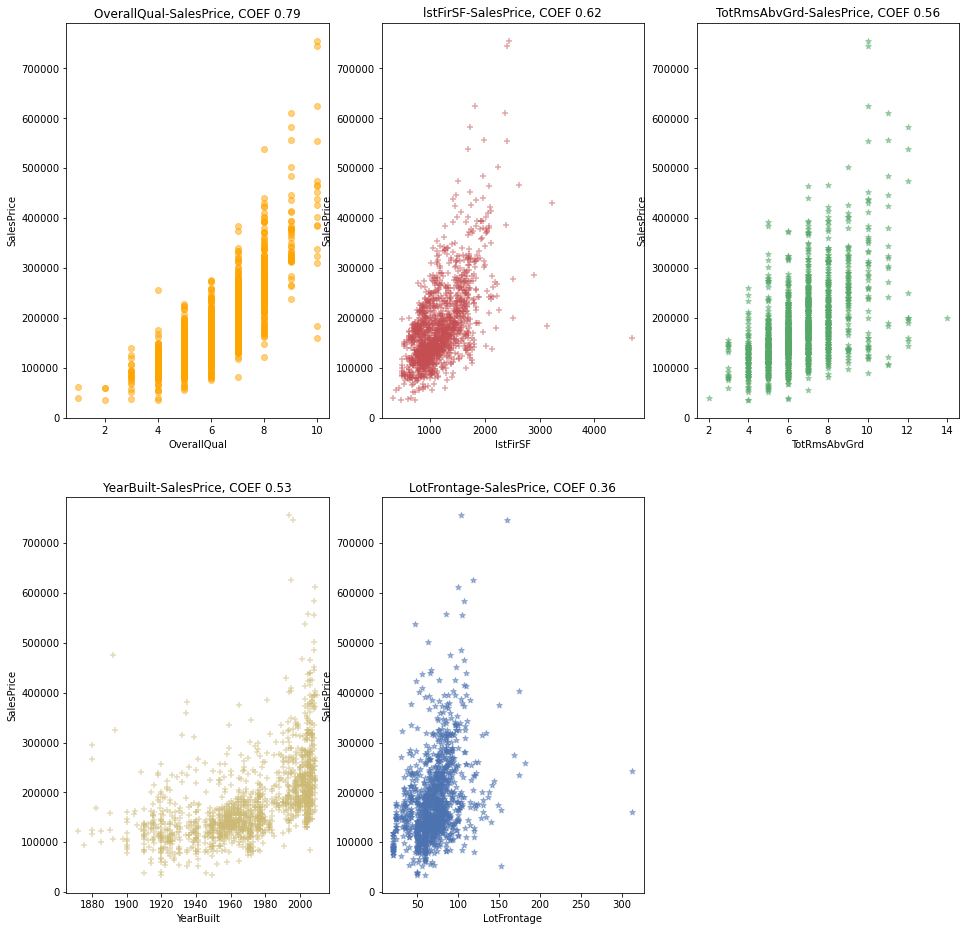

In [28]:
graf = plt.figure(figsize=(16,16))
gr_1=graf.add_subplot(231)
gr_1.scatter(dataset['OverallQual'],dataset['SalesPrice'],
             c="orange", alpha=0.5)
gr_1.set_xlabel("OverallQual")
gr_1.set_ylabel("SalesPrice")
gr_1.set_title("OverallQual-SalesPrice, COEF 0.79")

gr_2=graf.add_subplot(232)
gr_2.scatter(dataset['lstFirSF'],dataset['SalesPrice'],
            c="r", alpha=0.5, marker= r'+')
gr_2.set_xlabel("lstFirSF")
gr_2.set_ylabel("SalesPrice")
gr_2.set_title("lstFirSF-SalesPrice, COEF 0.62")

gr_3=graf.add_subplot(233)
gr_3.scatter(dataset['TotRmsAbvGrd'],dataset['SalesPrice'],
            c="g", alpha=0.5, marker= r'*')
gr_3.set_xlabel("TotRmsAbvGrd")
gr_3.set_ylabel("SalesPrice")
gr_3.set_title("TotRmsAbvGrd-SalesPrice, COEF 0.56")

gr_4=graf.add_subplot(234)
gr_4.scatter(dataset['YearBuilt'],dataset['SalesPrice'],
            c="y", alpha=0.5, marker= r'+')
gr_4.set_xlabel("YearBuilt")
gr_4.set_ylabel("SalesPrice")
gr_4.set_title("YearBuilt-SalesPrice, COEF 0.53")

gr_5=graf.add_subplot(235)
gr_5.scatter(dataset['LotFrontage'],dataset['SalesPrice'],
            c="b", alpha=0.5, marker= r'*')
gr_5.set_xlabel("LotFrontage")
gr_5.set_ylabel("SalesPrice")
gr_5.set_title("LotFrontage-SalesPrice, COEF 0.36")


### Análisis y selección de variables
Con respecto a los resultados obtenidos en el analisis exploratorio podemos ver que las variables con mayor correlación hacia la variable dependiente Y son OverallQual y -TotRMAbvGrd.  Por lo que serán las dos variables que utilizaremos para crear nuestros modelos de regresion lineal simple

### Generación del modelo por gradientes

#### Creación de la función

In [29]:
def GradDesc(X, Y, epoch, imprimir_error_cada, learning_rate):
    #parametros internos
    b0 = 0
    b1 = 0
    betas = np.array([b1,b0]) 
    n = len(X)
    
    #arrays iniciales
    errorArray = np.array([])
    betasArray = ([betas])
    
    #creacion de matriz con unos
    vect1 = np.ones_like(X)
    matriz = np.hstack([X, vect1])
    
    np.seterr(invalid='ignore')
    
    #loop
    for i in range(epoch):
        
        yhat = np.dot(matriz, betas).reshape(-1,1)
        
        error = np.sum(np.power(Y - yhat, 2))/(2*n)
        errorArray = np.append(errorArray, error)
        
        grads = np.sum((yhat-Y)*matriz,axis=0)*(1/n)
        
        betas = betas - learning_rate*grads
        betasArray = np.vstack([betasArray, betas])
        
        if (i+1) % imprimir_error_cada == 0:
            print('------------------------')
            print('iteracion {}'.format(i+1))
            print('error {}'.format(error))
            print('modelo b0: {}, b1: {}'.format(betas[1], betas[0]))
        else:
            pass
    return {'error': error, 'errorArray': errorArray, 'betas': betas, 'betasArray': betasArray}

#### Función para graficar error

In [30]:
def GrafError(errorArray, color, marker):
    iteraciones = np.arange(1, len(errorArray)+1, 1)
    plt.plot(iteraciones, errorArray, color=color, marker=marker)
    plt.xlabel('iteraciones')
    plt.ylabel('error')

#### Función para graficar la evolución del modelo

In [31]:
def GrafEvolucion(X, n_grafica, epoch, betasArray):
    # Diccionario vacio para añadir las predicciones
    predDict = {}

    # Creacion de matriz de X para vectorizacion
    vect1 = np.ones_like(X)
    matriz = np.hstack([X, vect1])

    for i in range(n_grafica, epoch+1, n_grafica):
        y_pred_temp = np.dot(matriz, betasArray[i]).reshape(-1,1)
        predDict['iteracion {}'.format(i)] = y_pred_temp

    for k, v in predDict.items():
        plt.plot(X, v, '.-', label=k)
    plt.show()

## Entrenamiento de Modelos

### Definicion de las variables a utilizar

In [115]:
X1 = TrainSet['OverallQual'].values.reshape(-1, 1)
X2 = TrainSet['TotRmsAbvGrd'].values.reshape(-1, 1)
Y = TrainSet['SalesPrice'].values.reshape(-1, 1)

### Modelo 1 - SalesPrice - OverallQual

In [134]:
Modelo1 = GradDesc(X1, Y, 50000, 10000, 0.01)

------------------------
iteracion 10000
error 1155517839.1261802
modelo b0: -97263.14357587117, b1: 45507.19329085135
------------------------
iteracion 20000
error 1155498259.9263356
modelo b0: -98153.09036901817, b1: 45645.66279870509
------------------------
iteracion 30000
error 1155498258.4322772
modelo b0: -98160.86447275669, b1: 45646.87239497193
------------------------
iteracion 40000
error 1155498258.4321632
modelo b0: -98160.93238320871, b1: 45646.88296136414
------------------------
iteracion 50000
error 1155498258.4321632
modelo b0: -98160.93297643853, b1: 45646.88305366656


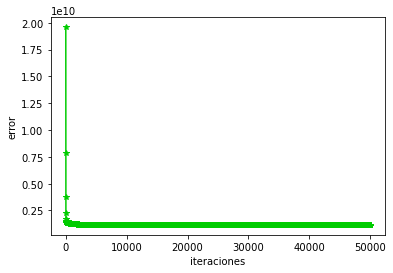

In [135]:
Arreglo_errores = Modelo1['errorArray']
color = '#00cc00'
marcador = '*'

GrafError(Arreglo_errores, color, marcador)

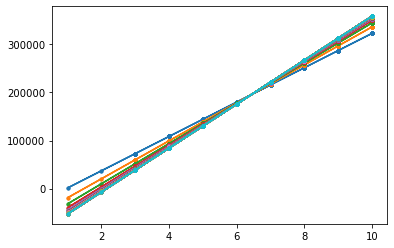

In [136]:
Arreglo_betas = Modelo1['betasArray']

GrafEvolucion(X1, 1000, 50000, Arreglo_betas)

### Modelo 2 - SalesPrice - TotRmsAbvGrd

In [112]:
Modelo2 = GradDesc(X2, Y, 100000, 20000, 0.008)

------------------------
iteracion 20000
error 2255375259.125825
modelo b0: 10283.084165237819, b1: 26142.939103841534
------------------------
iteracion 40000
error 2255375259.108534
modelo b0: 10283.859191101892, b1: 26142.827307760326
------------------------
iteracion 60000
error 2255375259.108534
modelo b0: 10283.859285260629, b1: 26142.827294178096
------------------------
iteracion 80000
error 2255375259.108534
modelo b0: 10283.859285269893, b1: 26142.82729417676
------------------------
iteracion 100000
error 2255375259.108534
modelo b0: 10283.859285269893, b1: 26142.82729417676


In [113]:
Modelo2 = GradDesc(X2, Y, 50000, 10000, 0.01)

------------------------
iteracion 10000
error 2255375274.0446215
modelo b0: 10261.080701369774, b1: 26146.113063766654
------------------------
iteracion 20000
error 2255375259.1087246
modelo b0: 10283.777959288147, b1: 26142.83902530275
------------------------
iteracion 30000
error 2255375259.108534
modelo b0: 10283.858994915417, b1: 26142.82733605987
------------------------
iteracion 40000
error 2255375259.108534
modelo b0: 10283.859284235463, b1: 26142.827294325976
------------------------
iteracion 50000
error 2255375259.108534
modelo b0: 10283.85928526823, b1: 26142.827294176997


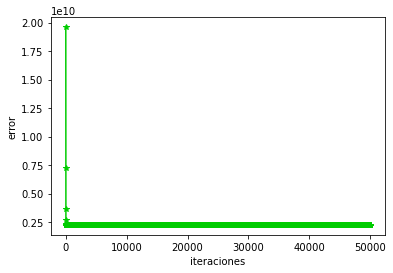

In [119]:
Arreglo_errores2 = Modelo2['errorArray']
color = '#00cc00'
marcador = '*'

GrafError(Arreglo_errores2, color, marcador)

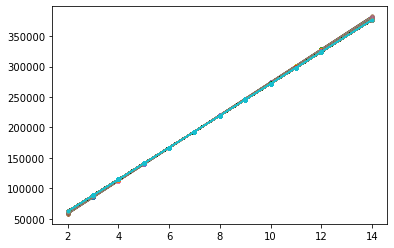

In [124]:
Arreglo_betas2 = Modelo2['betasArray']

GrafEvolucion(X2, 100, 50000, Arreglo_betas2)

## Modelo con Scikit-Learn

### Modelo 1 - SalesPrice - OverallQual

#### Split de Train y Test

In [47]:
X1_Sk = dataset['OverallQual'].values.reshape(-1, 1)
Y1_Sk = dataset['SalesPrice'].values.reshape(-1, 1)

dataTrain, dataTest, dataTrain_Sales, dataTest_Sales = train_test_split(X1_Sk, Y1_Sk, test_size=0.3, shuffle=True, random_state=123)

#### Entrenamiento del modelo

In [49]:
lm_1 = LinearRegression()
lm_1.fit(dataTrain, dataTrain_Sales)
print(lm_1.coef_)
print(lm_1.intercept_)

[[44976.49429688]]
[-94032.19372475]


#### Prediccion

In [50]:
y_hat_skl = lm_1.predict(dataTrain)
y_hat_skl

array([[130850.27775967],
       [ 40897.2891659 ],
       [130850.27775967],
       ...,
       [220803.26635344],
       [130850.27775967],
       [175826.77205655]])

#### R^2

In [51]:
lm_1.score(dataTrain, dataTrain_Sales)

0.6252097749070478

### Modelo 2 SalesPrice - TotRmsAbvGrd

#### Split de Train y Test

In [125]:
X2_Sk = dataset['TotRmsAbvGrd'].values.reshape(-1, 1)
Y2_Sk = dataset['SalesPrice'].values.reshape(-1, 1)

dataTrain, dataTest, dataTrain_Sales, dataTest_Sales = train_test_split(X2_Sk, Y2_Sk, test_size=0.3, shuffle=True, random_state=123)

#### Entrenamiento del modelo

In [126]:
lm_2 = LinearRegression()
lm_2.fit(dataTrain, dataTrain_Sales)
print(lm_2.coef_)
print(lm_2.intercept_)

[[25530.08818755]]
[13362.5339539]


#### Prediccion

In [127]:
y_hat_skl = lm_2.predict(dataTrain)
y_hat_skl

array([[141012.97489163],
       [166543.06307917],
       [141012.97489163],
       ...,
       [243133.32764181],
       [141012.97489163],
       [166543.06307917]])

#### R^2

In [128]:
lm_2.score(dataTrain, dataTrain_Sales)

0.2716314309268465

## Función para predicción

In [55]:
def PredTriple(X, betas_grad, modelo_skl):
    # Creación del vector para la función de gradientes
    vect1 = np.ones_like(X)
    matriz = np.hstack([X, vect1])

    # Predicciones en cada modelo
    ypred_grad = np.dot(matriz, betas_grad).reshape(-1,1)
    ypred_skl = modelo_skl.predict(X)
    ypred_prom = (ypred_grad + ypred_skl)/2

    # Arreglo con resultados
    result = np.array([ypred_grad, ypred_skl, ypred_prom])
    print(result)
    
    return result

### Variables para prediccion

In [137]:
X1_Test = TestSet['OverallQual'].values.reshape(-1, 1)
X2_Test = TestSet['TotRmsAbvGrd'].values.reshape(-1, 1)
Y_Test = TestSet['SalesPrice'].values.reshape(-1, 1)

### Prediccion con Modelo 1

In [138]:
ArrBetas1 = Modelo1['betas']
Pred_modelo1 = PredTriple(X1_Test, ArrBetas1, lm_1)
Pred_modelo1

[[[221367.24839923]
  [175720.36534556]
  [130073.48229189]
  [221367.24839923]
  [130073.48229189]
  [267014.13145289]
  [267014.13145289]
  [175720.36534556]
  [130073.48229189]
  [221367.24839923]
  [175720.36534556]
  [175720.36534556]
  [267014.13145289]
  [175720.36534556]
  [221367.24839923]
  [221367.24839923]
  [175720.36534556]
  [175720.36534556]
  [267014.13145289]
  [130073.48229189]
  [221367.24839923]
  [130073.48229189]
  [130073.48229189]
  [ 84426.59923823]
  [130073.48229189]
  [130073.48229189]
  [175720.36534556]
  [221367.24839923]
  [175720.36534556]
  [221367.24839923]
  [130073.48229189]
  [175720.36534556]
  [130073.48229189]
  [267014.13145289]
  [175720.36534556]
  [221367.24839923]
  [130073.48229189]
  [175720.36534556]
  [130073.48229189]
  [175720.36534556]
  [130073.48229189]
  [130073.48229189]
  [130073.48229189]
  [ 38779.71618456]
  [221367.24839923]
  [130073.48229189]
  [175720.36534556]
  [130073.48229189]
  [130073.48229189]
  [ 84426.59923823]


array([[[221367.24839923],
        [175720.36534556],
        [130073.48229189],
        [221367.24839923],
        [130073.48229189],
        [267014.13145289],
        [267014.13145289],
        [175720.36534556],
        [130073.48229189],
        [221367.24839923],
        [175720.36534556],
        [175720.36534556],
        [267014.13145289],
        [175720.36534556],
        [221367.24839923],
        [221367.24839923],
        [175720.36534556],
        [175720.36534556],
        [267014.13145289],
        [130073.48229189],
        [221367.24839923],
        [130073.48229189],
        [130073.48229189],
        [ 84426.59923823],
        [130073.48229189],
        [130073.48229189],
        [175720.36534556],
        [221367.24839923],
        [175720.36534556],
        [221367.24839923],
        [130073.48229189],
        [175720.36534556],
        [130073.48229189],
        [267014.13145289],
        [175720.36534556],
        [221367.24839923],
        [130073.48229189],
 

In [143]:
n = len(Y_Test)
rmse1 = np.sqrt(np.sum(np.power(Y_Test - Pred_modelo1, 2), axis = 1)/(n))
rmse1

array([[50629.42580515],
       [50608.60856875],
       [50616.8870617 ]])

### Prediccion con Modelo 2

In [141]:
ArrBetas2 = Modelo2['betas']
Pred_modelo2 = PredTriple(X2_Test, ArrBetas2, lm_2)
Pred_modelo2

[[[193283.65034451]
  [167140.82305033]
  [167140.82305033]
  [193283.65034451]
  [167140.82305033]
  [271712.13222704]
  [219426.47763868]
  [193283.65034451]
  [193283.65034451]
  [167140.82305033]
  [167140.82305033]
  [193283.65034451]
  [245569.30493286]
  [114855.16846198]
  [271712.13222704]
  [167140.82305033]
  [193283.65034451]
  [140997.99575615]
  [219426.47763868]
  [167140.82305033]
  [193283.65034451]
  [167140.82305033]
  [140997.99575615]
  [140997.99575615]
  [167140.82305033]
  [167140.82305033]
  [219426.47763868]
  [219426.47763868]
  [193283.65034451]
  [167140.82305033]
  [114855.16846198]
  [193283.65034451]
  [140997.99575615]
  [271712.13222704]
  [167140.82305033]
  [167140.82305033]
  [167140.82305033]
  [140997.99575615]
  [167140.82305033]
  [140997.99575615]
  [219426.47763868]
  [140997.99575615]
  [167140.82305033]
  [167140.82305033]
  [193283.65034451]
  [167140.82305033]
  [193283.65034451]
  [114855.16846198]
  [167140.82305033]
  [193283.65034451]


array([[[193283.65034451],
        [167140.82305033],
        [167140.82305033],
        [193283.65034451],
        [167140.82305033],
        [271712.13222704],
        [219426.47763868],
        [193283.65034451],
        [193283.65034451],
        [167140.82305033],
        [167140.82305033],
        [193283.65034451],
        [245569.30493286],
        [114855.16846198],
        [271712.13222704],
        [167140.82305033],
        [193283.65034451],
        [140997.99575615],
        [219426.47763868],
        [167140.82305033],
        [193283.65034451],
        [167140.82305033],
        [140997.99575615],
        [140997.99575615],
        [167140.82305033],
        [167140.82305033],
        [219426.47763868],
        [219426.47763868],
        [193283.65034451],
        [167140.82305033],
        [114855.16846198],
        [193283.65034451],
        [140997.99575615],
        [271712.13222704],
        [167140.82305033],
        [167140.82305033],
        [167140.82305033],
 

In [144]:
rmse2 = np.sqrt(np.sum(np.power(Y_Test - Pred_modelo2, 2), axis = 1)/(n))
rmse2

array([[67145.42146864],
       [67168.30466889],
       [67153.58309562]])

### Grafica de errores

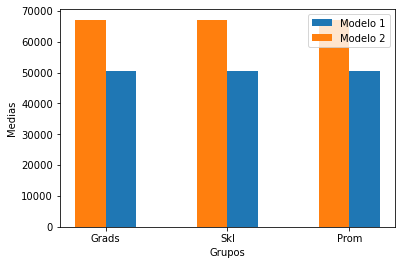

In [155]:
grmse1 = np.reshape(rmse1, (3,))
grmse2 = np.reshape(rmse2, (3,))
labels = ['Grads', 'Skl', 'Prom']

plt.bar(labels, grmse1, width=0.25, align='edge', label='Modelo 1')
plt.bar(labels, grmse2, width=-0.25, align='edge', label='Modelo 2')
plt.xlabel('Grupos')
plt.ylabel('Medias')
plt.legend()

## Conclusion

Después de realizar las predicciones utilizando para el Modelo 1 la variable independiente 'OverallQual' y para el Modelo 2 la variable 'TotRmAvgGrd', podemos ver que el que tiene un RMSE más bajo con un valor entre 50629.4 y 50608.6 es el Modelo 1, que de hecho según la matriz de correlación es la variable que tiene un mayor coeficiente que el resto, siendo este un 0.8.  Por otro lado, comparando las 3 distintas técnicas de entrenamiento del modelo, vemos que el que tiene el error más bajo es el modelo entrenado con Scikit Lear con un valor de 50608.6, estando por debajo de los otros dos errores con una diferencia mínima.

## Video referencia